## Computational Physics Assignment 5
*Do or do not... there is no try.*
--Yoda in *Star Wars*


1.  Download the data file CSIRO_Recons_gmsl_mo_2011.txt and fit a quadratic model ($A + Bx + Cx^2$) to the data and determine the uncertainties in the coefficients.

In [ ]:
"""
Question 1
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.loadtxt("Data/CSIRO.txt", skiprows=1)

# slice the array to separate independent and dependent variables
x = data[:,0]
y = data[:,1]

def quad(x, A, B, C):
    return A + B * x + C * (x * x)

norm, err = curve_fit(quad, x, y)

print("The uncertainty is: {0:6.6f}".format(err[0][0]))
fit = norm[0] + norm[1] * x + norm[2] * (x * x)

plt.xlabel("time (yr)")
plt.ylabel("level (m)")
plt.scatter(x, y, marker="o", c="green", s=2, label="Data")
plt.plot(x, fit, "b-", label="Optimized Fit")

plt.legend()
plt.show()

2.	In this problem you explore using a non-linear least square fitting routine to fit the data shown in the figure below which is in the file spec.txt. The data, including the uncertainties in the y values, are provided in the table below. Your task is to fit the function

 $y(t) = A(1 + B cos(\omega t))e^{-t^2/(2\tau^2)} + C$
 to the data (given below), where the fitting parameters are A, B, C, $\omega$ and $\tau$.

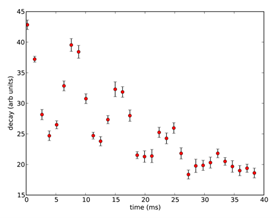

(a)	Write a Python program that (i) reads the data in from data file spec.txt, (ii) defines a function func(t, A, B, C, tau, omega) for the function y(t) above, and (iii) produces a plot of the data and the function y(t). Choose the fitting parameters A, B, C, tau, and omega to produce an approximate fit “by eye” to the data. You should be able estimate reasonable values for these parameters just by looking at the data and thinking about the behavior of y(t). For example,    while . What parameter in y(t) controls the period of the peaks observed in the data? Use that information to estimate the value of that parameter.

(b)	Write a program using the SciPy function scipy.optimize.curve_fit to fit the equation above to the data and thus find the optimal values of the fitting parameters A, B, C, tau, omega . Your program should plot the data along with the fitting function using the optimal values of the fitting parameters. Write a function to calculate the reduced $\chi^2$. Print out the value of the  $\chi^2$/dof along with the optimal values of the fitting parameters. You can use the results from part (a) to estimate good starting values of the fitting parameters.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2_contingency

"""
Question 2
"""

# a --------------
data = np.loadtxt("Data/spec.txt", float)

x = data[:,0]
y = data[:,1]
numData = len(x)
myData = [x, y]
"""
ii. fun
"""
def func(t, A, B, C, tau, omega):
    
    cosPart = 1 + B * np.cos(omega * t)
    ePart = np.power(np.e, (-1 * np.square(t)) / (2 * (tau * tau)))

    return A * cosPart * ePart + C

"""
iii. 
"""

plt.xlabel("x")
plt.ylabel("y")

"""
Estimating the ideal fit parameters
"""
def grapher():
  plt.scatter(x, y, marker="o", c="darkblue", s=4, label="Data")
  plt.plot(x, func(x, 2.4, 6.6, 25.6, 13.3, 1), "darkgreen", label="Fit")
  plt.legend()
  plt.show()

#grapher()
"""
Part B
"""

norm, err = curve_fit(func, x, y)

def graphFit():
  plt.scatter(x, y, marker="o", c="darkblue", s=4, label="Data")
  plt.plot(x, func(x, norm[0], norm[1], norm[2], norm[3], norm[4]), "darkgreen", label="Fit")
  plt.legend()
  plt.show()

# graphFit()

def chi_squared(x, y, a, b):
    sigY = np.std(y)
    chi2 = np.sum((y - (a + b * x) ** 2) / sigY ** 2)
    return chi2 / (numData - 2)

def icedChi():
  chi2, p, dof, expected = chi2_contingency(myData)
  chi_dof = chi2 / dof
  print("The value of chi2/dof is {0:6.6f}, the optimal fitting values are 2.4 and 6.6".format(chi_dof))

# icedChi()

3.A chemistry students wishes to know how fast her cappuccino will cool.  Write a Python program that utilized the Euler algorithm to solve Newton’s law of cooling,
$\frac{dT}{dt} = -r(T-T_s)$
 where T is the temperature and t the time.  The user should specify the initial temperature, the ambient temperature (Ts), and the duration of the cooling.  Take r = 0.026/min.  Create a graph for an initial temperature of 180.0 $^{\circ}$F, and ambient temperature of 740 $^{\circ}$F, and a time period of 10 minutes.


In [ ]:
"""
Created on October 4
"""
import numpy as np
import matplotlib.pyplot as plt

# define the slope
def der(r, T, Ts):
    return -r * (T - Ts)

# create discrete values of t
# N is the number of points
N = 20
t = np.linspace(0, 10, N)
h = t[1] - t[0]

y = np.zeros(N)

#initial conditions
y[0] = 180
#Euler algorithm
for i in range(1, N):
    y[i] = y[i-1] + der(0.026, y[i-1], 74) * h
plt.plot(t, y, "bo", label="Euler")

plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

4.  Solve the following equation for x:  $9^x-6^x=4^x$.

In [ ]:
"""
Question 4
Find the root of the equation f(x)
"""
import numpy as np
from scipy.optimize import root_scalar

def f(x):
    return np.power(9,x) - np.power(6,x) - np.power(4,x)

result = root_scalar(f, bracket=[-10, 10])  # Initial bracket
print(result.root)

5. Using the Newton-Raphson method, determine the root of the following equation within an error of 0.01: $f(x)=5x-3x^2+10sin(x) -2$.
    

In [ ]:
"""
Question 5
Newton-Raphson Method
Just guess a point then keep getting closer to the root
"""
import numpy as np
from scipy.optimize import root_scalar


def f(x):
    y = 5 * x - 3 * (x * x) + 10 * np.sin(x) - 2
    return y

def fPrime(x):
    rv = 5 - 6 * x + 10 * np.cos(x)
    return rv

def Newton(guess, func, funcPrime, tol = 1e-6):
    
    x = guess
    for i in range(100):
        fX = func(x) # y value of function
        if abs(fX) <= tol: # if it is super close to zero
            print("Answer is at {0:6.6f}".format(x))
            return x
  
        deriv = funcPrime(x) # 
        if deriv == 0: # if the function was a constant
            raise ValueError("Derivative is zero. Newton-Raphson will not converge.")
        """
        new guess is equal to x=
        """
        x = x - fX / deriv 

Newton(4, f, fPrime)
